# Traffic Volume Analysis

### Import libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

## Load The Dataset

In [35]:
df = pd.read_csv('Traffic_data.csv')

### Data Exploration
- Check the number of Rows and Columns
- Check the column names
- Check for missing data 
- Check for duplicate values

In [36]:
df.head()

,datetime,hour,day_of_week,traffic_volume
0,2024-01-01 06:00,6,Monday,180
1,2024-01-01 07:00,7,Monday,320
2,2024-01-01 08:00,8,Monday,350
3,2024-01-01 09:00,9,Monday,310
4,2024-01-01 10:00,10,Monday,220


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datetime        30 non-null     object
 1   hour            30 non-null     int64 
 2   day_of_week     30 non-null     object
 3   traffic_volume  30 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [38]:

df.describe()

,hour,traffic_volume
count,30.000000,30.000000
mean,11.766667,314.333333
std,4.924837,68.854336
min,6.000000,165.000000
25%,7.250000,301.250000
50%,9.000000,337.500000
75%,17.000000,360.000000
max,19.000000,395.000000


In [39]:
print(f"Data Contains {df.shape[0]} numbers of Rows and {df.shape[1]} numbers of Columns")

Data Contains 30 numbers of Rows and 4 numbers of Columns


### Data Cleaning - Checking for missing and duplicated values

In [40]:
df.isna().any()

datetime          False
hour              False
day_of_week       False
traffic_volume    False
dtype: bool

In [41]:
print(f"There are {df.isna().any().sum()} missing values")
print(f"There are {df.duplicated().any().sum()} duplicates")

There are 0 missing values
There are 0 duplicates


In [42]:
df[:]

,datetime,hour,day_of_week,traffic_volume
0,2024-01-01 06:00,6,Monday,180
1,2024-01-01 07:00,7,Monday,320
2,2024-01-01 08:00,8,Monday,350
3,2024-01-01 09:00,9,Monday,310
4,2024-01-01 10:00,10,Monday,220
5,2024-01-01 16:00,16,Monday,360
6,2024-01-01 17:00,17,Monday,390
7,2024-01-01 18:00,18,Monday,370
8,2024-01-01 19:00,19,Monday,240
9,2024-01-02 06:00,6,Tuesday,170


In [43]:
df.datetime = pd.to_datetime(df.datetime)
df.datetime

0    2024-01-01 06:00:00
1    2024-01-01 07:00:00
2    2024-01-01 08:00:00
3    2024-01-01 09:00:00
4    2024-01-01 10:00:00
5    2024-01-01 16:00:00
6    2024-01-01 17:00:00
7    2024-01-01 18:00:00
8    2024-01-01 19:00:00
9    2024-01-02 06:00:00
10   2024-01-02 07:00:00
11   2024-01-02 08:00:00
12   2024-01-02 09:00:00
13   2024-01-02 16:00:00
14   2024-01-02 17:00:00
15   2024-01-02 18:00:00
16   2024-01-03 06:00:00
17   2024-01-03 07:00:00
18   2024-01-03 08:00:00
19   2024-01-03 09:00:00
20   2024-01-03 16:00:00
21   2024-01-03 17:00:00
22   2024-01-03 18:00:00
23   2024-01-04 06:00:00
24   2024-01-04 07:00:00
25   2024-01-04 08:00:00
26   2024-01-04 09:00:00
27   2024-01-04 16:00:00
28   2024-01-04 17:00:00
29   2024-01-04 18:00:00
Name: datetime, dtype: datetime64[ns]

# Data Visualization
### How does Traffic volume change throughout the day?
- identify peak and off-peak periods
- identify demand distribution

In [44]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

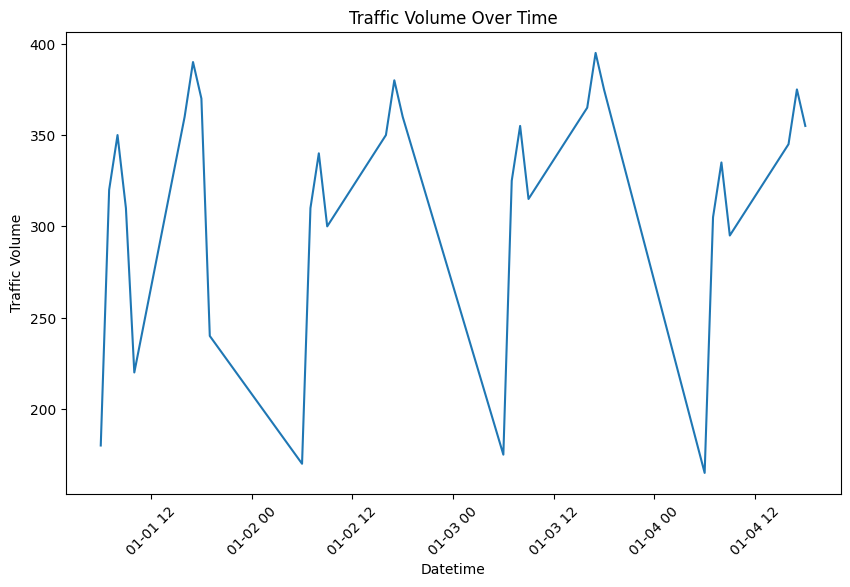

In [45]:
plt.figure(figsize=(10,6))
plt.title('Traffic Volume Over Time')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.plot(df['datetime'], df['traffic_volume'])
plt.show()

<Figure size 1000x600 with 0 Axes>

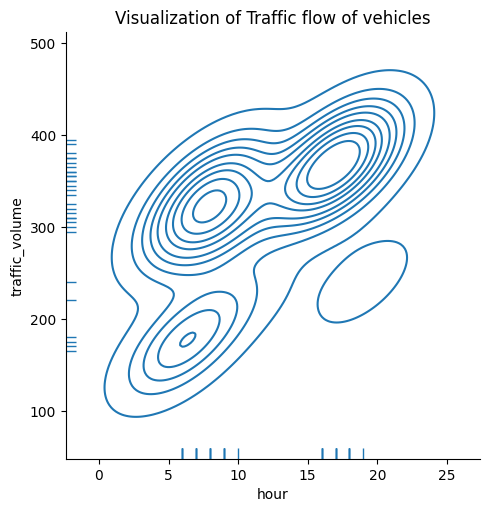

In [46]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x=df['hour'], y=df['traffic_volume'], kind='kde', rug=True)
plt.title("Visualization of Traffic flow of vehicles")
plt.show()

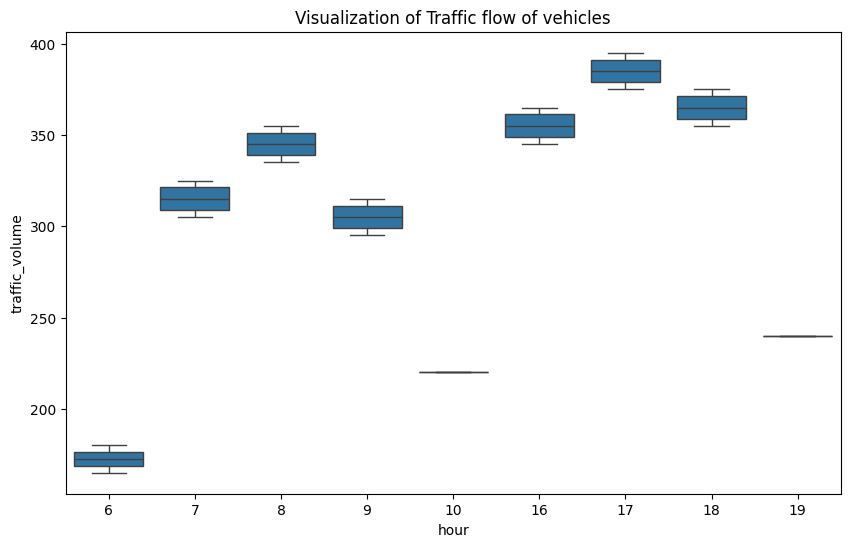

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x=df['hour'], y=df['traffic_volume'])
plt.title("Visualization of Traffic flow of vehicles")
plt.show()

In [48]:
bar = px.bar(
    x= df['datetime'],
    y=df['traffic_volume'],
    color= df['day_of_week'],
    color_continuous_scale='Aggrnyl', 
    title='Visualization of Traffic Flow')

bar.update_layout(xaxis_title='Datetime',
                  coloraxis_showscale=False,
                  yaxis_title='Traffic Volume')
bar.show()

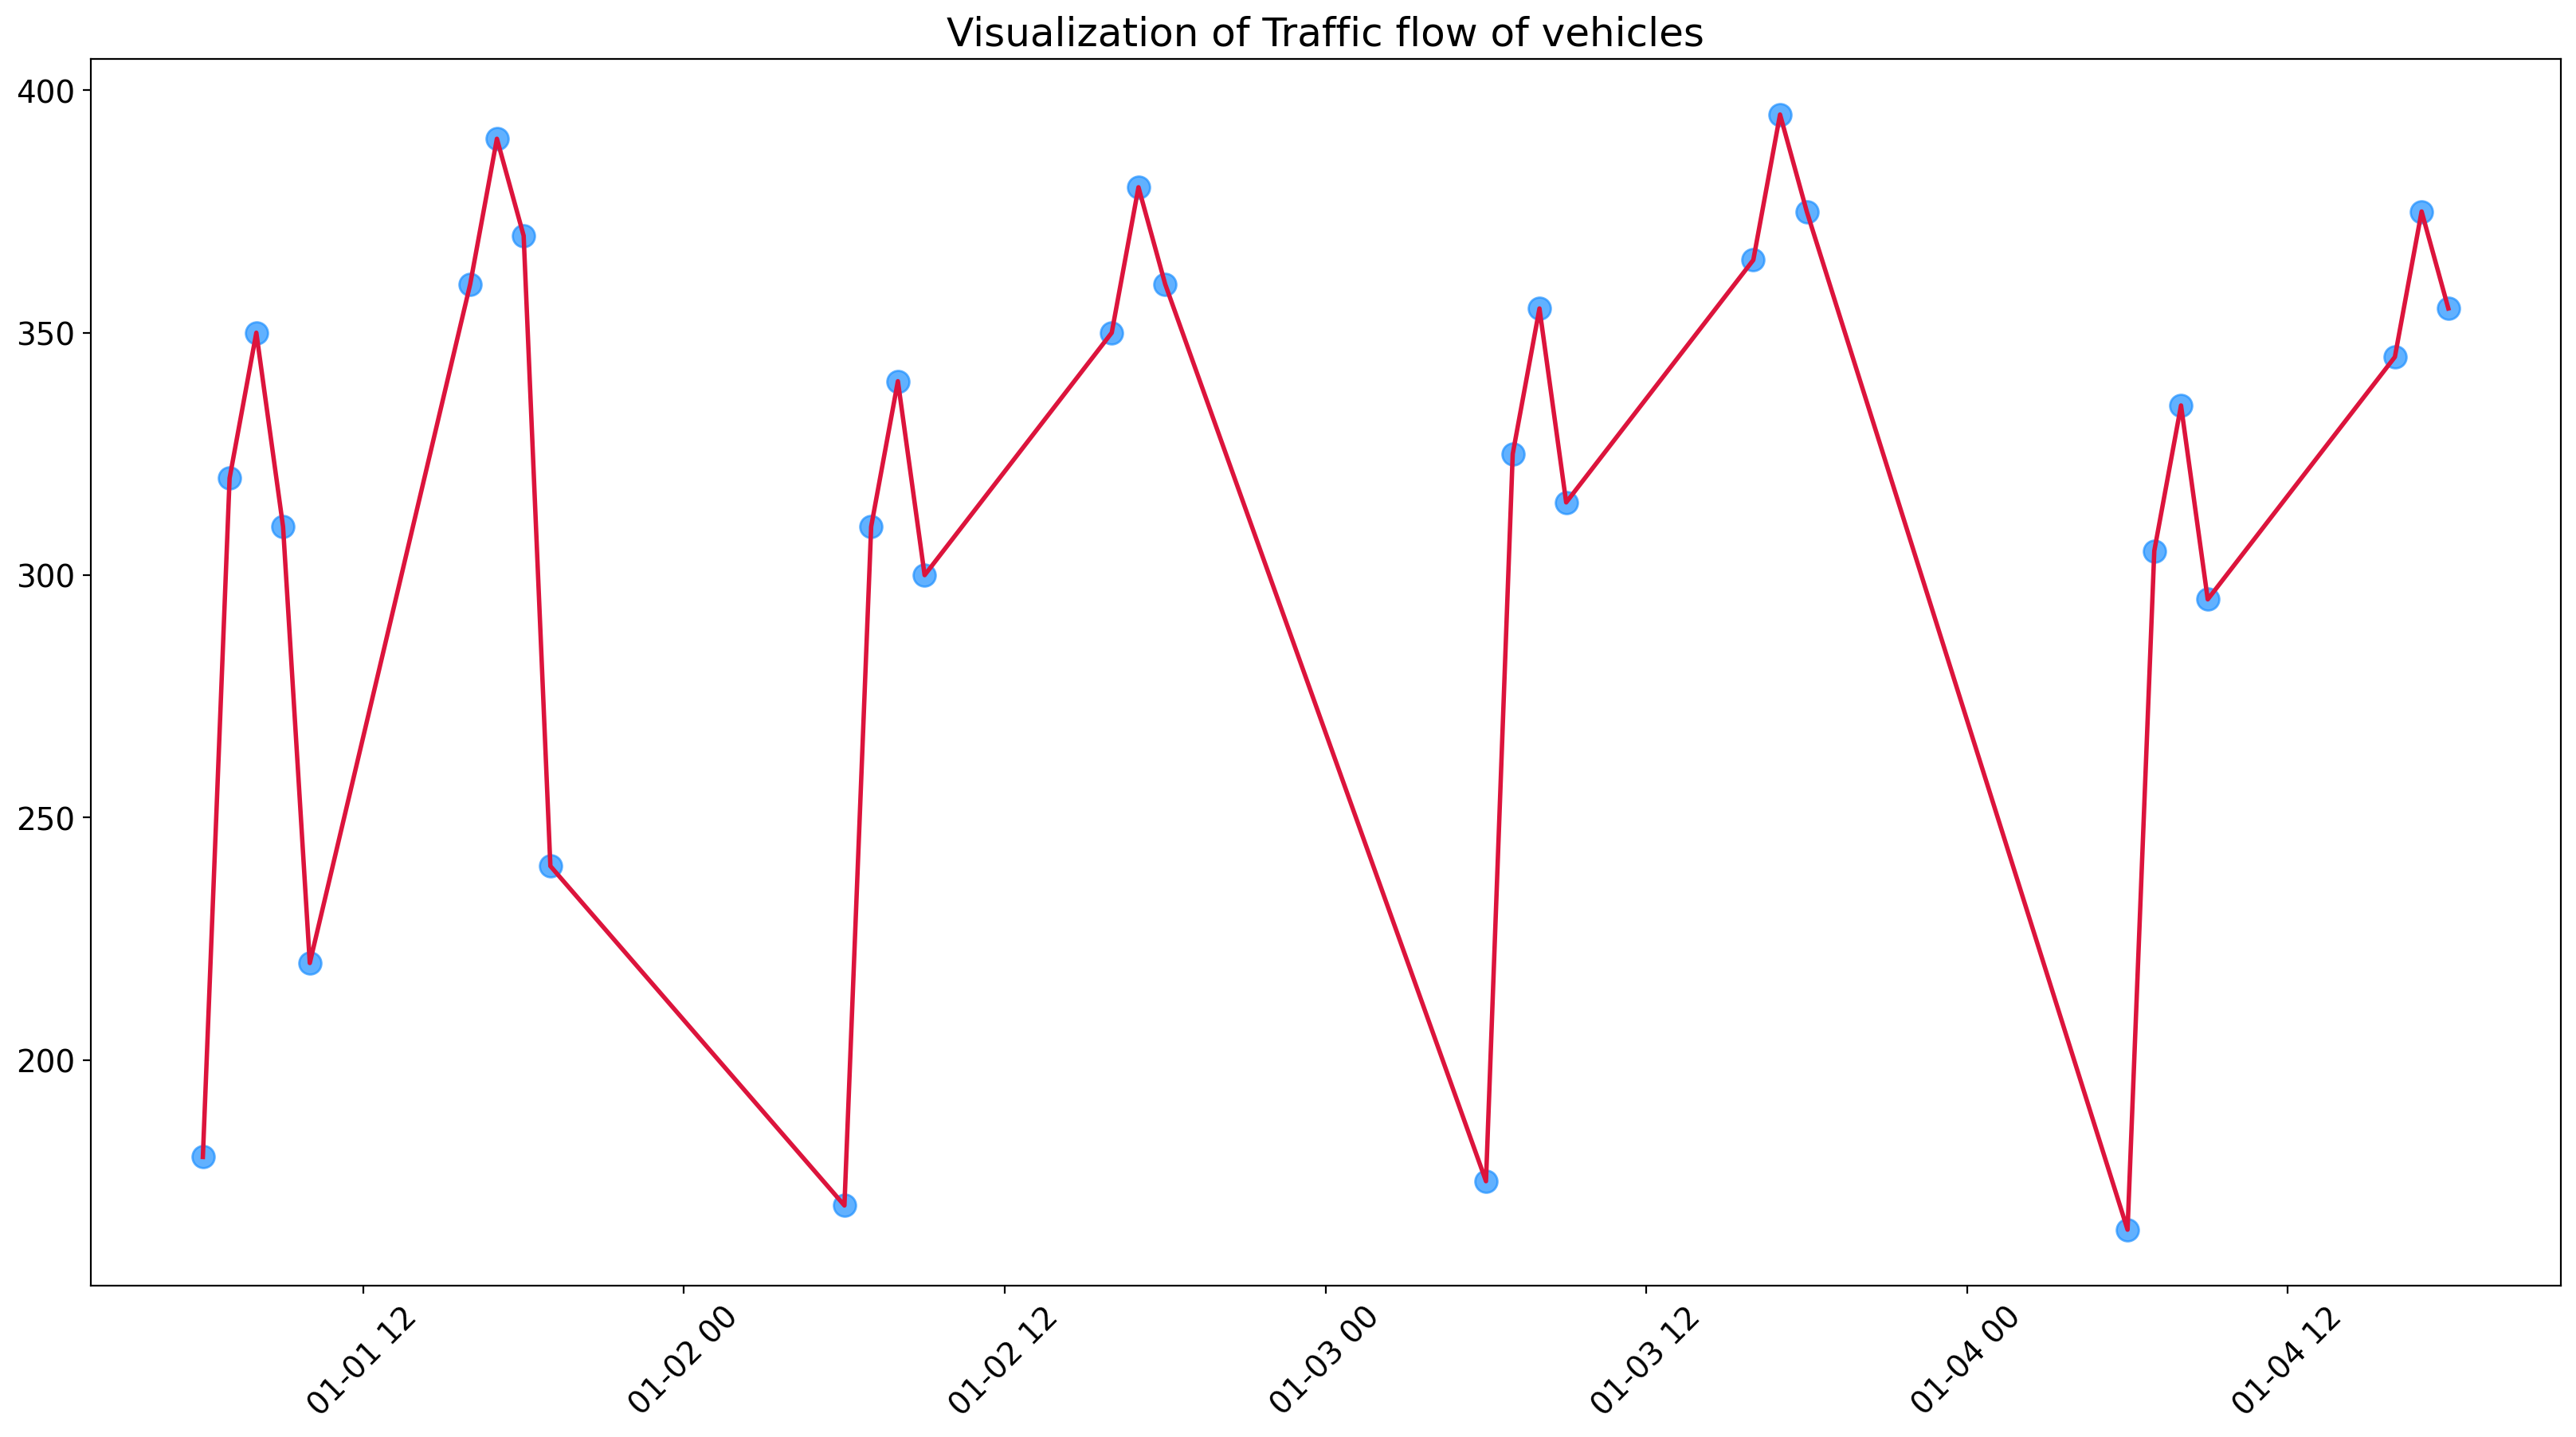

In [49]:
plt.figure(figsize=(20,10), dpi=200)
plt.title("Visualization of Traffic flow of vehicles", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca() # get current axis

ax.scatter(x=df['datetime'], y=df['traffic_volume'], c='dodgerblue', alpha=0.7, s=100)
ax.plot(df['datetime'], df['traffic_volume'], c='crimson', linewidth=2)

plt.show()